<a href="https://colab.research.google.com/github/faizanahemad/eva/blob/master/assignment-4/1st_CandidateArchitectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1st File: Candidate Architectures**
    - Receptive field of full image
    - Start with 16 vs 32 vs 64 (64 filters was a winner in assignment 3), We will test this by visualizing the 1st layer and checking if some kernels are dead kernels.
    - MaxPool vs 1x1 with stride=2
    - Stop at 4x4 or 5x5 or 6x6 or 7x7 or 9x9
    - 10 Epochs
    - Max Tried candidate architectures in this file = `2x4x4 = 32`
    - We will promote 8 or less architectures from here

In [0]:
!pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master > /dev/null

In [2]:
import pandas as pd
import numpy as np
import time
import gc
import os
import sys
import dill
from matplotlib import pyplot as plt
from keras import backend as K
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
import warnings
from data_science_utils.vision.keras import *
from keras.layers import Activation
warnings.filterwarnings("ignore")
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Using TensorFlow backend.


In [3]:

X_train, Y_train, X_test, Y_test = get_mnist_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


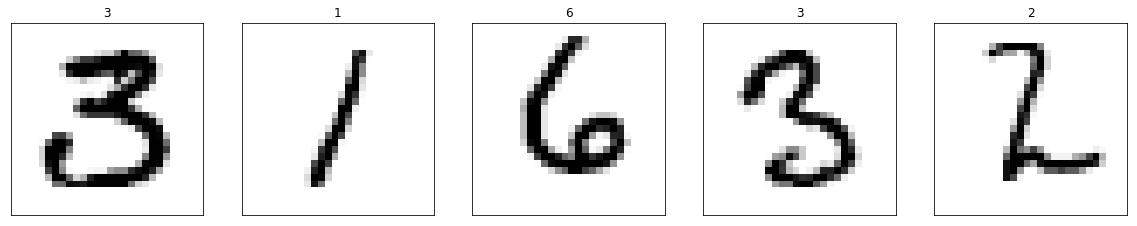

In [4]:
show_examples(X_train[10:15], Y_train[10:15],classes=get_mnist_labels())

# Step 1: Lets determine 1st Layer Kernels (16/32/64)
- I believe 32 will be best, 64 is too many for Mnist and 16 too little

In [5]:

model = Sequential()

 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) # 12
model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(32, 3,3, activation='relu')) # 8
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(Convolution2D(10, 4,4))



model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Instructions for updating:
Colocations handled automatically by placer.
Params =  14058
Instructions for updating:
Use tf.cast instead.
Layer Names:  ['conv2d_1', 'conv2d_2', 'conv2d_3', 'max_pooling2d_1', 'conv2d_4', 'conv2d_5', 'conv2d_6', 'max_pooling2d_2', 'conv2d_7', 'flatten_1', 'activation_1']
Validation Loss (0.08563183589776358, 0.974499990940094)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  14058
Score =  [0.06942189076139281, 0.9792166666666666]
Balanced Accuracy = 97.91% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  14058
Score =  [0.060128817325085404, 0.9815]
Balanced Accuracy = 98.14% 


Compute filters 0 to 16
Costs of filter   0:     5 ( 0.63s )
Costs of filter   1:     3 ( 0.51s )
Costs of filter   2:     4 ( 0.52s )
Costs of filter   3:     3 ( 0.51s )
Costs of filter   4:     6 ( 0.53s )
Costs of filter   5:     0 ( 0.51s )
Costs of filter   6:     1 ( 0.53s )
Costs of filter   7:     3 ( 0.54s )
Costs of filter   8:     3 ( 0.51s )
Costs of filter   9:     1 ( 0.46s )
Costs of filter  10:     2 ( 0.48s )
Costs of filter  11:     2 ( 0.48s )
Costs of filter  12:     4 ( 0.48s )
Costs of filter  13:     2 ( 0.46s )
Costs of filter  14:     3 ( 0.49s )
Costs of filter  15:     2 ( 0.47s )
16 filter processed.
Filter Losses
 [5.360431, 3.0145378, 3.8971136, 3.3212485, 5.567122, 0.0, 1.3716938, 2.8421142, 2.6008837, 1.3683734, 1.6677516, 1.8186871, 3.7162669, 1.646509, 3.4074163, 2.0532417]


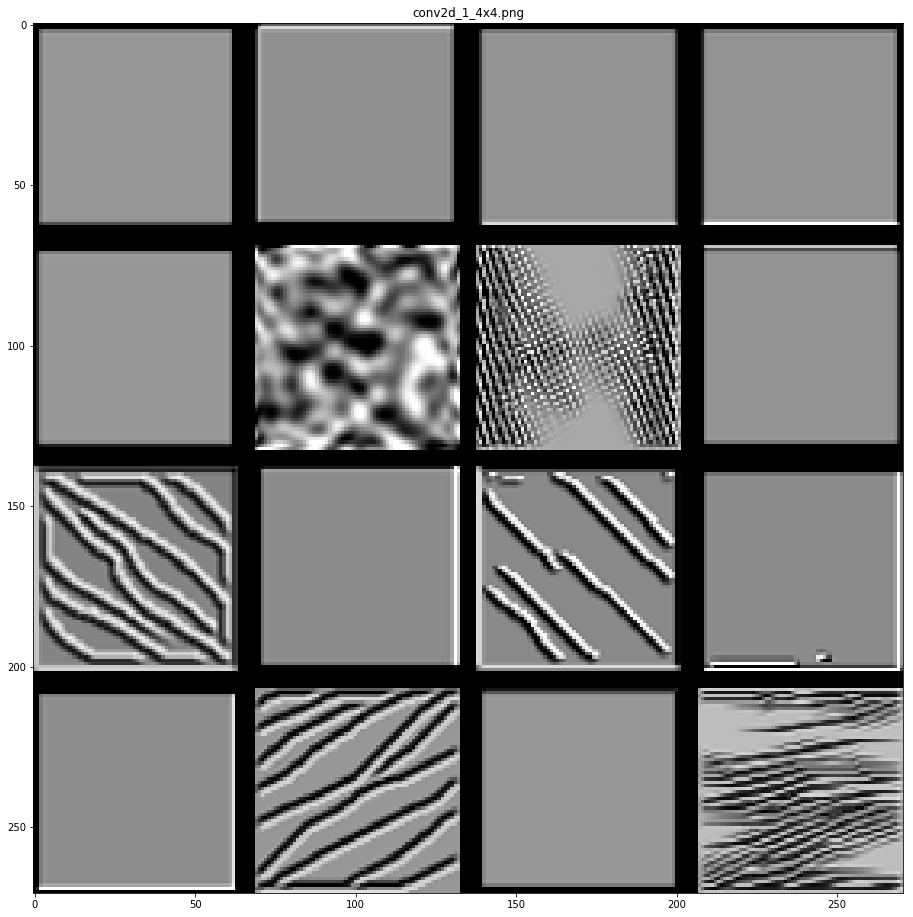

In [7]:

visualize_layer(model,"conv2d_1",filter_range=(0,16),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

Notice how multiple filters are blank, That tells us that 64 is too much. 

In [10]:

model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(32, 3,3, activation='relu')) # 24
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 12
model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Convolution2D(16, 3,3, activation='relu')) # 6
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 6,6))



model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  15006
Layer Names:  ['conv2d_24', 'conv2d_25', 'conv2d_26', 'max_pooling2d_5', 'conv2d_27', 'conv2d_28', 'conv2d_29', 'conv2d_30', 'conv2d_31', 'flatten_4', 'activation_4']
Validation Loss (0.11062125698725382, 0.9668333303133647)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  15006
Score =  [0.07904690198600292, 0.9756]
Balanced Accuracy = 97.54% 


Compute filters 0 to 16
Costs of filter   0:     2 ( 0.71s )
Costs of filter   1:     2 ( 0.66s )
Costs of filter   2:     4 ( 0.69s )
Costs of filter   3:     2 ( 0.67s )
Costs of filter   4:     3 ( 0.69s )
Costs of filter   5:     6 ( 0.67s )
Costs of filter   6:     8 ( 0.69s )
Costs of filter   7:     5 ( 0.70s )
Costs of filter   8:     7 ( 0.68s )
Costs of filter   9:     6 ( 0.69s )
Costs of filter  10:     5 ( 0.69s )
Costs of filter  11:     2 ( 0.69s )
Costs of filter  12:     4 ( 0.71s )
Costs of filter  13:     9 ( 0.70s )
Costs of filter  14:     5 ( 0.70s )
Costs of filter  15:     2 ( 0.71s )
16 filter processed.
Filter Losses
 [2.0679188, 2.1844738, 4.143221, 1.7156621, 3.1245883, 6.01171, 7.852904, 5.129941, 7.121954, 6.0464544, 5.38178, 2.0206683, 3.6845639, 8.90548, 4.572249, 2.25653]


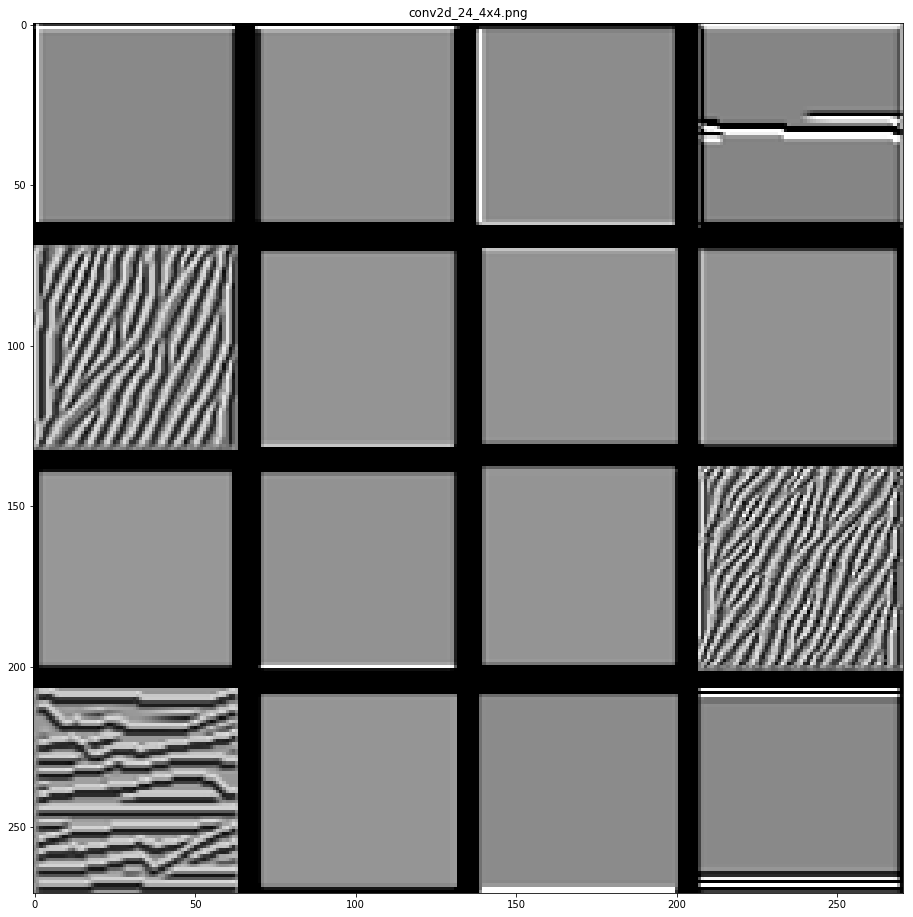

In [11]:
visualize_layer(model,"conv2d_24",filter_range=(0,16),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64),step=0.5,epochs=20)

Compute filters 0 to 32
Costs of filter   0:    21 ( 1.51s )
Costs of filter   1:    44 ( 1.51s )
Costs of filter   2:    26 ( 1.54s )
Costs of filter   3:     0 ( 1.54s )
Costs of filter   4:    82 ( 1.58s )
Costs of filter   5:   122 ( 1.59s )
Costs of filter   6:   105 ( 1.54s )
Costs of filter   7:    68 ( 1.54s )
Costs of filter   8:    19 ( 1.53s )
Costs of filter   9:    22 ( 1.53s )
Costs of filter  10:    53 ( 1.58s )
Costs of filter  11:    25 ( 1.56s )
Costs of filter  12:    91 ( 1.55s )
Costs of filter  13:    25 ( 1.58s )
Costs of filter  14:   111 ( 1.55s )
Costs of filter  15:   104 ( 1.54s )
Costs of filter  16:    85 ( 1.56s )
Costs of filter  17:    17 ( 1.55s )
Costs of filter  18:    26 ( 1.61s )
Costs of filter  19:     0 ( 1.57s )
Costs of filter  20:    90 ( 1.59s )
Costs of filter  21:    46 ( 1.57s )
Costs of filter  22:    56 ( 1.62s )
Costs of filter  23:    31 ( 1.62s )
Costs of filter  24:    22 ( 1.57s )
Costs of filter  25:    75 ( 1.61s )
Costs of filte

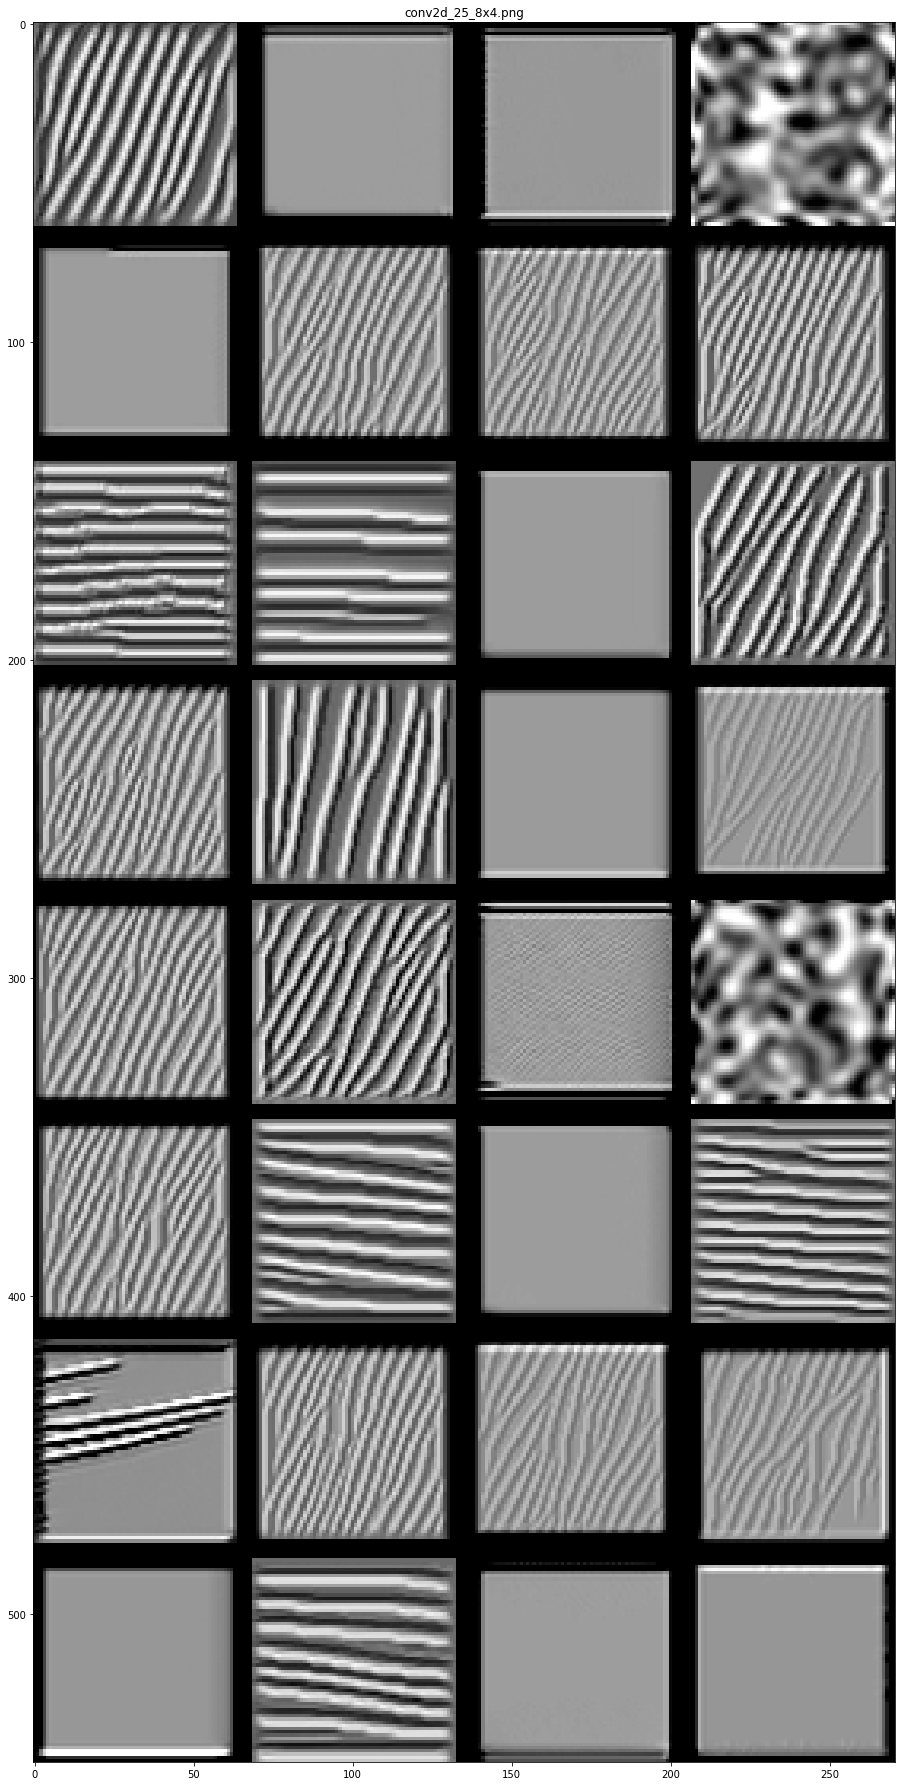

In [13]:
visualize_layer(model,"conv2d_25",filter_range=(0,32),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64),step=1.,epochs=50)

Even 16-32 seems overkill for this task as lots of filters stay dead

In [28]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Convolution2D(16, 3,3, activation='relu')) #6
model.add(Convolution2D(10, 1, activation='relu')) #6
model.add(Convolution2D(10, 6,6))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  12846
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  12846
Score =  [0.09841032130097349, 0.96985]
Balanced Accuracy = 96.96% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  12846
Score =  [0.08523574805110692, 0.9738]
Balanced Accuracy = 97.35% 


In [0]:
visualize_layer(model,"conv2d_193",filter_range=(0,16),upscaling_steps=10,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

# Misc Code

In [6]:
K.epsilon()

1e-07

In [0]:
layer = model.layers[0]
weights = layer.get_weights()[0]
len(weights)
weights.shape
print()
weights[:,:,:,0]

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 26, 26, 16)        1040      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 7, 7, 32)          4640      
__________

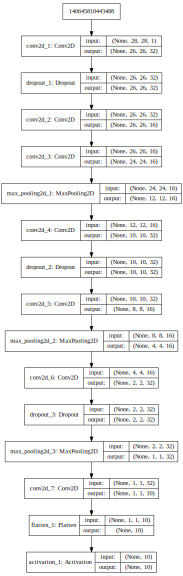

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

m2d = model_to_dot(model, show_shapes=True,)
m2d.set_size('8x18')
SVG(m2d.create(prog='dot', format='svg'))